# **Lab #5: K-Nearest Neighbors**
---

### **Description**
In this lab, you will implement KNN (K-Nearest Neighbors) models. KNNs are a popular machine learning algorithm used for classification and regression tasks. Through this lab, you'll gain hands-on experience in building and training KNN models, and using them to make accurate predictions. You'll get to see firsthand how KNN models work, and how they can be used to solve real-world problems.

<br>


### **Lab Structure**

**Part 1**:  [Breast Cancer Dataset](#p1)

**Part 2**: [Spotify Dataset](#p2)

**Part 3**: [[OPTIONAL] Wine Quality Dataset](#p3)

**Part 4**: [[OPTIONAL] Animals Dataset](#p4)

**Part 5**: [[OPTIONAL] Australia Dataset](#p5)

</br>


###**Goals**
By the end of this lab, you will:
* Gain hands-on experience in building and training KNN models using the scikit-learn library.
* Make KNN models using sklearn and use these models to make predictions about new data.
* Apply KNN models for classification tasks.
* Evaluate the accuracy of KNN models using metrics such as confusion matrix.
* Apply KNN models to a real-world datasets.

</br>

### **Cheat Sheets**

* [pandas Commands](https://docs.google.com/document/d/1KWwBKnL0bFj7dmanDKOpOJuCykqWEbvIbulzCTyZ7aE/edit?usp=sharing)

* [Feature Engineering and Selection with pandas](https://docs.google.com/document/d/191CH-X6zf4lESuThrdIGH6ovzpHK6nb9NRlqSIl30Ig/edit?usp=sharing)

* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1qkNP54isNQqWbjyiBFjAdbcRjCwOjLOxcZujDF3ixcI/edit?usp=sharing)

* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1fCZ1Gp9eM-Oxs_qb6cOiyPpwkqz155L0GMJl2oxQfXo/edit?usp=share_link)


**Run the code below before continuing:**

In [2]:
import warnings
warnings.filterwarnings('ignore')

!pip install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn import datasets, model_selection

<a name="p1"></a>
## **Part 1: Breast Cancer Dataset [Practice Together]**
---
#### **About the Dataset**
Breast cancer is one of the most common types of cancer in women. Each year in the United States, about 264,000 women are diagnosed with breast cancer. The abilty to detect it early is extremely important. The following dataset is taken from the [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). The dataset contains mammography exam results and whether or not cancer was detected.

The features are as follows:
* `radius`
* `texture`: standard deviation of gray-scale values
* `perimeter`
* `area`
* `smoothness`: local variations in radius lengths
* `compactness`: perimeter^2 / area - 1
* `concavity`: severity of concave portions of the contour
* `concave points`: number of concave portions of the contour
* `symmetry`
* `fractal dimension`: "coastline approximation" - 1

Note: There is data recorded for the mean, standard error, and worst (or largest) for each feature, resulting in 30 total features.
<br>

#### **Your Task**
Using the Breast Cancer dataset, we will do the following:
* Create a KNN classifier model that can be used to predict whether or not a patient has breast cancer;
* Use the model to predict whether or not patient have breast cancer based on various mean radii and mean textures



### **Step #1: Load the data**
---

Use the following code to load the breast cancer dataset.


In [3]:
cancer_dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
df['TARGET'] = cancer_dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### **Step #2: Decide independent and dependent variables**
---

To simplify our KNN fitting, we will fit our classifier using the `"mean radius"` and `"mean texture"` features in order to predict whether the patient has breast cancer.

In [4]:
# Slice our dataset to view the features we care about
df[["mean radius","mean texture", "TARGET"]]

,mean radius,mean texture,TARGET
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


**Before we continue our steps, let's visualize our data.**

Since we are building a classifier, it can be useful to look at some of the variables. Below we will look at `"mean radius"` and  `"mean texture"` and see if there appears to be a correlation with the detection of cancer.

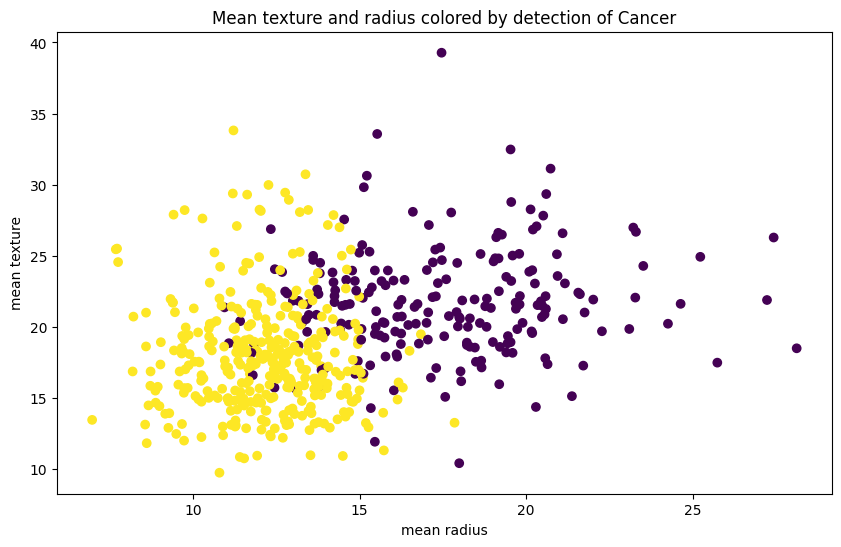

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df["mean radius"], df["mean texture"], c=df["TARGET"])
plt.title("Mean texture and radius colored by detection of Cancer")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()
#yellow: breast cancer detected, purple: not detected

### **Step #3: Split data into training and testing data**
---


In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["mean radius","mean texture"]],
                                                                    df[["TARGET"]], test_size=0.2, random_state=42)

#### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["mean radius","mean texture"]],
                                                                    df[["TARGET"]], test_size=0.2, random_state=42)

### **Step #4: Import the KNN algorithm**
---

In [7]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

#### **Solution**

In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step #5: Initialize the model and set hyperparameters**
---


Remember to set the *hyperparameter* to `n_neighbors = 4`.

In [8]:
# initialize
model = KNeighborsClassifier(n_neighbors = 4)

#### **Solution**

In [ ]:
# initialize
model = KNeighborsClassifier(n_neighbors = 4)

### **Step #6: Fit your model and make a prediction. Create a visualization if applicable.**
---

In [9]:
# fit
model.fit(X_train, y_train)
# predict
pred = model.predict(X_test)

#### **Solution**

In [ ]:
# fit
model.fit(X_train, y_train)

In [ ]:
# predict
pred = model.predict(X_test)

**Create a visualization**

We can now use a colormesh plot to show the decision boundary of the KNN model. *This code has been provided*.


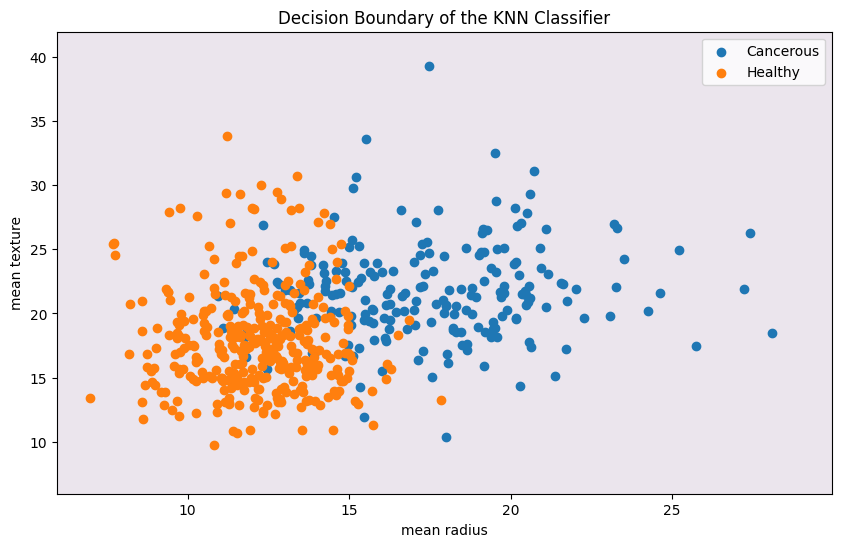

In [ ]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(6, 30, 0.1),
                     np.arange(6, 42, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby('TARGET'):
  ax.scatter(data["mean radius"], data["mean texture"], label=["Cancerous","Healthy"][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

### **Step #7: Evaluate your model**
---

Test the accuracy of your model.

Accuracy Score:  0.9035087719298246


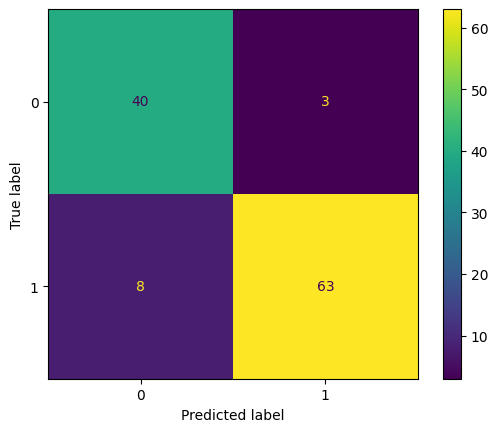

In [10]:
# Evaluation of accuracy
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

#### **Solution**

In [ ]:
# Evaluation of accuracy
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Step #8: Use the model**
---

Predict whether the following patients have cancer or not:

1. Is a patient with mean radius `15.5` and mean texture `31.2` likely to have cancer?
2. Is a patient with mean radius `12.2` and mean texture `34.5` likely to have cancer?



In [11]:
patient1 = pd.DataFrame([[15.5, 31.2]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient1.values)[0]
print(f"Patient 1 {['is likely', 'is not likely'][prediction]} to have cancer")
patient2 = pd.DataFrame([[12.2, 34.5]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient2.values)[0]
print(f"Patient 2 {['is likely', 'is not likely'][prediction]} have cancer")

# A patient with a mean radius of 15.5 and a mean texture of 31.2 is likely to have breast cancer
# A patient with a mean radius of 12.2 and a mean texture of 34.5 is likely to have breast cancer

Patient 1 is likely to have cancer
Patient 2 is not likely have cancer


#### **Solution**

In [ ]:
patient1 = pd.DataFrame([[15.5, 31.2]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient1.values)[0]
print(f"Patient 1 {['is likely', 'is not likely'][prediction]} to have cancer")
patient2 = pd.DataFrame([[12.2, 34.5]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient2.values)[0]
print(f"Patient 2 {['is likely', 'is not likely'][prediction]} have cancer")

# A patient with a mean radius of 15.5 and a mean texture of 31.2 is likely to have breast cancer
# A patient with a mean radius of 12.2 and a mean texture of 34.5 is likely to have breast cancer

### **[Optional]: Hyperparameter Tuning**
---

Run the given code below to find the optimal k for our model. What is this k?

{1: 92.98245614035088, 2: 92.98245614035088, 3: 92.98245614035088, 4: 93.85964912280701, 5: 95.6140350877193, 6: 96.49122807017544, 7: 95.6140350877193, 8: 95.6140350877193, 9: 95.6140350877193}


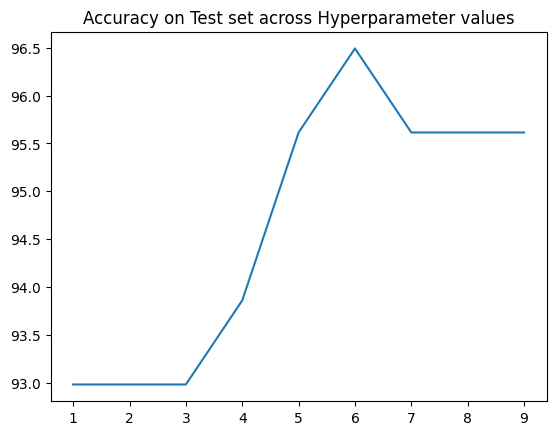

Top score of optimal classifier: 96.49%
Best Value of N to use: 6


In [12]:
# Now lets see how accurate it is looking at all 30 variables

# Load all columns of the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                      df.drop("TARGET", axis=1), df[["TARGET"]],
                                      test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,10):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

top_score = max(scores.values())
print(f"Top score of optimal classifier: {top_score:.2f}%")
best_n = list(scores.keys())[list(scores.values()).index(top_score)]
print(f"Best Value of N to use: {best_n}")

### **Reflection question**
Answer the following question:

1. In the case of predicting breast cancer, do you think it's more important to reduce false positives or false negatives?

In [13]:
''

#A false positive is an outcome where the model incorrectly predicts the positive class.
#A false negative is an outcome where the model incorrectly predicts the negative class.

#I would say then that it's more important to reduce false negatives because the negative class would be 'those who are unlikely to have cancer'
#So a positive class is would be 'those who are likely to have cancer. If it incorrectly predicts that someone has cancer (false posiitive) then it would be better than
#incorrectly predicting 'those who are unlikely to have cancer' (false negative) because the cancer would be overlooked and missed which could result in a totally
#avoidable death in a patient

''

''

<a name="p2"></a>

---
## **Part 2: Spotify Dataset**
---
#### **About the Dataset**
Spotify is one of the most popular digital music streaming services with over 515 million monthly users. The following dataset from Spotify data looks at different qualities of songs like energy, key, loudness, and tempo to see if a song is a top or bottom hit.

The features are as follows:
* `artist`: song artist(s)
* `song`: song title
* `duration_ms`: the track length in milliseconds (ms)
* `year`: the year the song was released
* `top half`: whether or not the song is in the top half of hits
* `danceability`: how suitable a track is for dancing (0.0: least danceable, 1.0: most danceable)
* `energy`: perceptual measure of intensity and activity (0.0 - 1.0)
* `key`: the key the track is in; integers map to pitches using standard Pitch Class notation (0: C, 1: C♯/D♭, 2:D, ..., 11: B)
* `loudness`: the overall loudness of a track in decibels (dB)
* `mode`: the modality of a track, or the type of scale from which its melodic content is derived (0: minor, 1: major)
* `speechiness`: a measure of the presence of spoken words in the track (0-0.33: music and other non-speech-like tracks, 0.33-0.66: contain both music and speech, 0.66-1.0: most likely made entirely of spoken words (e.g. talk show, audio book, poetry))
* `acousticness`: a confidence measure of whether or not the track is acoustic (0.0: low confidence, 1.0: high confidence)
* `instrumentalness`: predicts whether or not a track contains vocals (0.0: vocal content, 1.0: no vocal content)
* `liveness`: detects the presence of an audience in the recording ( > 0.8: strong likelihood the track was performed live)
* `valence`: musical positiveness conveyed by the track (lower valence: more negative, higher valence: more positive)
* `tempo`: the overall estimated tempo in beats per minute (BPM)
* `genre`: the genre in which the track belongs
* `explicit`: whether or not the song is explicit
* `explicity binary`: whether or not the song is explicit (0: no, 1: yes)

<br>

#### **Your Task**
Using the Spotify dataset, you will do the following:
* Create a KNN model that can predict whether a song will be a hit or a bust;
* Predict whether songs with various keys and energies will be hits or busts.

### **Step #1: Load the data**
---

Use the following code to load the dataset.

In [14]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQJ9UIsI2j8vPnefdBj6GIrUGiDMsF5HRVAg4rsfaZqX5fAoTGLGydLvPXPQvE5ZSo9_aet1SC5UQji/pub?gid=1132556054&single=true&output=csv"
spotify_df = pd.read_csv(url)

spotify_df.head()

,artist,song,duration_ms,year,top half,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit,explicity binary
0,Britney Spears,Oops!...I Did It Again,211160,2000,1,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,False,0
1,blink-182,All The Small Things,167066,1999,1,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",False,0
2,Faith Hill,Breathe,250546,1999,1,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",False,0
3,Bon Jovi,It's My Life,224493,2000,1,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",False,0
4,*NSYNC,Bye Bye Bye,200560,2000,1,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,False,0


### **Step #2: Decide independent and dependent variables**
---

For this problem, we are interested in how the `key` and `energy` affect whether or not a song becomes a hit. Use the following code to create a visual of these variables.

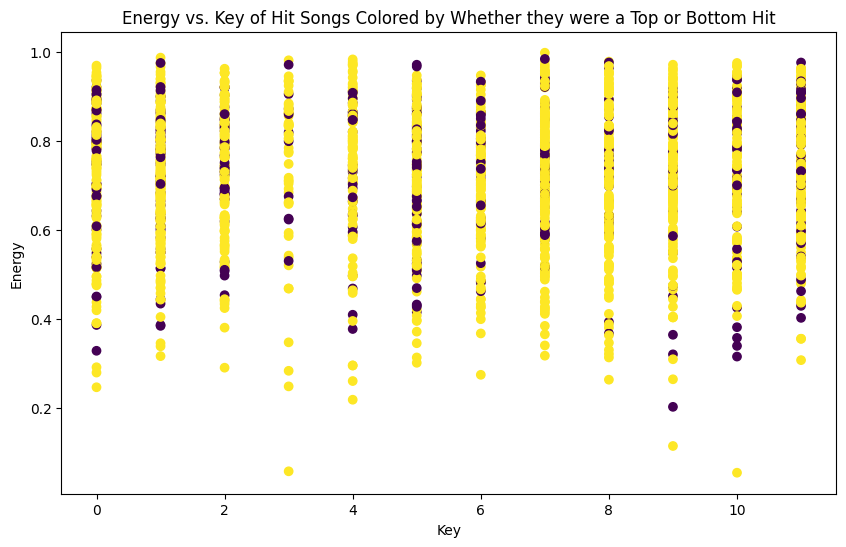

In [15]:
key = spotify_df["key"]
energy = spotify_df["energy"]
top_half = spotify_df["top half"]

plt.figure(figsize=(10,6))
plt.scatter(key, energy, c = top_half)

# yellow: top hit, purple: bottom hit
plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

### **Step #3: Split data into training and testing data**
---

Split the data as described above.

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(spotify_df[["key","energy"]], spotify_df[["top half"]], test_size=0.2, random_state=42)

### **Step #4: Import the KNN algorithm**
---


In [17]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step #5: Initialize the model and set hyperparameters**
---

Remember to set the *hyperparameter* to `n_neighbors = 3`.

In [18]:
# initialize
model = KNeighborsClassifier(n_neighbors = 3)

### **Step #6: Fit your model and make a prediction. Create a visualization if applicable.**
---

In [19]:
# fit
model.fit(X_train, y_train)
# predict
pred = model.predict(X_test)

**Create a graph in a similar style to the graph from Step #2. Use your prediction for the color (`c = pred`) and your testing data (`key = X_test["key"]` and `energy = X_test["energy"]`).**

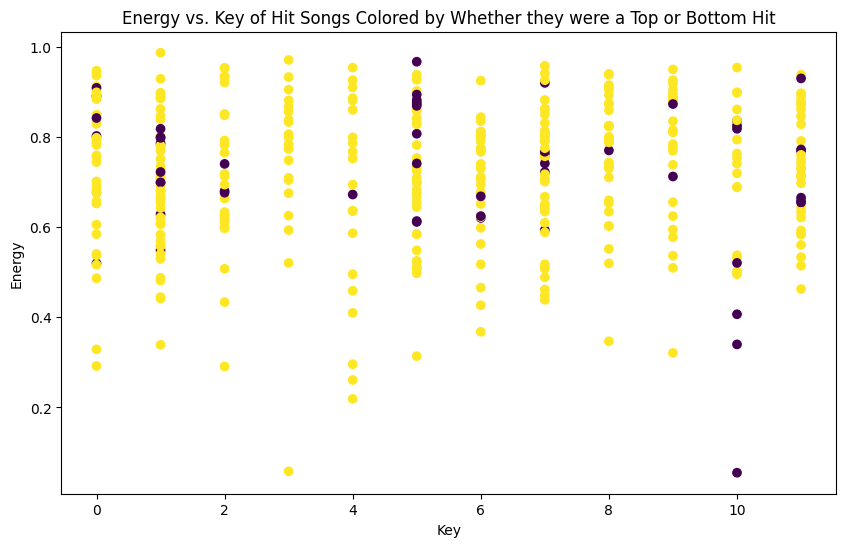

In [20]:
key = X_test["key"]
energy = X_test["energy"]

plt.figure(figsize=(10,6))
plt.scatter(key, energy, c = pred)

# yellow: top hit, purple: bottom hit
plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

### **Step #7: Evaluate your model**
---

Display the `accuracy_score` and `ConfusionMatrixDisplay.from_estimator`.

Accuracy Score:  0.7175


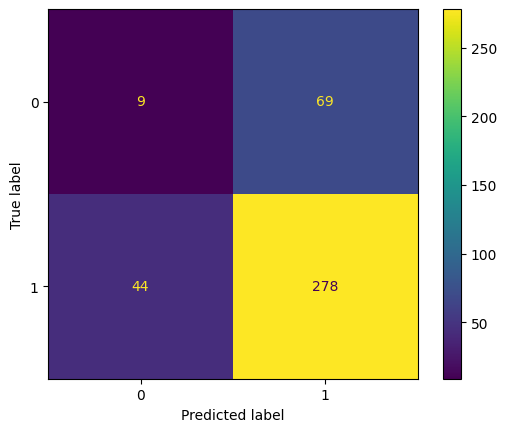

In [21]:
# Evaluation of accuracy
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Step #8: Use the model**
---

Use your model to predict whether the following songs are in the top hits.

1. We are given an song with `key = 3` and `energy = 0.8`. According to your KNN model, will this song be in the top half of hits?
2. We are given another song with `key = 10` and `energy = 0.2`. Will this song be a bust or a hit?
3. We are given an song with `key = 1` and `energy = 0.5`. Will this song be a bust or a hit?

In [22]:
# First Song
song1 = pd.DataFrame([[3, 0.8]], columns=["key", "energy"])
prediction = model.predict(song1.values)[0]
print(f"Song 1 {['is part of the top half', 'is not part of the top half'][prediction]}")
# Second Song
song2 = pd.DataFrame([[10, 0.2]], columns=["key", "energy"])
prediction = model.predict(song2.values)[0]
print(f"Song 2 {['is a hit', 'is a bust'][prediction]}")
# Third Song
song3 = pd.DataFrame([[1, 0.5]], columns=["key", "energy"])
prediction = model.predict(song3.values)[0]
print(f"Song 3 {['is a hit', 'is a bust'][prediction]}")

Song 1 is not part of the top half
Song 2 is a hit
Song 3 is a bust


### **Reflection question**
Answer the following question:

1. Do you think using only the two features `energy` and `key` is enough to predict whether or not a song will be a top hit?

In [23]:
spotify_df.corr()

,duration_ms,year,top half,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit,explicity binary
duration_ms,1.000000,-0.317428,0.025147,-0.060038,-0.079412,-0.002735,-0.080107,-0.004358,0.068202,0.010595,-0.004288,0.024536,-0.116475,-0.027258,0.123352,0.123352
year,-0.317428,1.000000,-0.009399,0.033600,-0.109701,0.007108,0.017210,-0.008172,0.002855,0.033302,-0.050418,-0.027717,-0.208814,0.079353,0.078078,0.078078
top half,0.025147,-0.009399,1.000000,0.008763,-0.025966,0.020599,0.041668,-0.003235,0.010701,0.019165,-0.052499,-0.028588,-0.009586,0.023709,0.037568,0.037568
danceability,-0.060038,0.033600,0.008763,1.000000,-0.104039,0.032746,-0.033303,-0.067512,0.145718,-0.065413,0.023213,-0.126408,0.403242,-0.173944,0.248890,0.248890
energy,-0.079412,-0.109701,-0.025966,-0.104039,1.000000,-0.003698,0.651068,-0.041413,-0.055549,-0.446198,0.037764,0.156263,0.335342,0.156202,-0.162952,-0.162952
key,-0.002735,0.007108,0.020599,0.032746,-0.003698,1.000000,-0.007548,-0.153448,0.007615,0.002227,-0.008207,-0.033253,0.037174,-0.000840,0.003203,0.003203
loudness,-0.080107,0.017210,0.041668,-0.033303,0.651068,-0.007548,1.000000,-0.028356,-0.076040,-0.310232,-0.104963,0.102009,0.232403,0.081506,-0.089960,-0.089960
mode,-0.004358,-0.008172,-0.003235,-0.067512,-0.041413,-0.153448,-0.028356,1.000000,0.001260,0.005341,-0.038722,0.024945,-0.074176,0.050301,0.049252,0.049252
speechiness,0.068202,0.002855,0.010701,0.145718,-0.055549,0.007615,-0.076040,0.001260,1.000000,0.001269,-0.062837,0.062366,0.072552,0.054232,0.418724,0.418724
acousticness,0.010595,0.033302,0.019165,-0.065413,-0.446198,0.002227,-0.310232,0.005341,0.001269,1.000000,-0.005278,-0.110412,-0.127819,-0.102791,-0.033755,-0.033755


In [24]:
''

'I do not think it is enough only because the correlation between top half and either key or energy is pretty low. I would like to see explicit and/or explicity binary'
'added to the prediction because the have higher correlation to the top half (the target/ what we are trying to predict)'

''

''

<a name="p3"></a>

---
## [OPTIONAL] **Part 3: Wine Dataset**
---
#### **About the Dataset**
We've already explored this dataset; now it's time to create a KNN model using it! The following dataset is taken from the [UCI ML Wine Recognition](https://archive.ics.uci.edu/ml/datasets/wine) dataset and contains the results of a chemical analysis of wines grown in the same region in Italy by three different cultivars (grape types).

The features are as follows:
* `alcohol`
* `malic_acid`
* `ash`
* `alcalinity_of_ash`
* `magnesium`
* `total_phenols`
* `flavanoids`
* `nonflavanoid_phenols`
* `proanthocyanins`
* `color_intensity`
* `hue`
* `od280/od315_of_diluted_wines`
* `proline`
* `TARGET`: which cultivar the wine originated from

<br>

#### **Your Task**
* Build a model that can predict which cultivar (grape type) the wine originated from.
* Predict the which cultivar a wine originated from given its malic acid and color intensity


### **Step #1: Load the data**
---

Use the following code to load the wine dataset.
```
wine_dataset = datasets.load_wine()
df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
df['TARGET'] = wine_dataset.target
df
```

In [25]:
wine_dataset = datasets.load_wine()
wine_df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
# create a new column TARGET
wine_df['TARGET'] = wine_dataset.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### **Step #2: Decide independent and dependent variables**
---

Use `.var()` and `.corr()` to choose your independent variables that will help predict the `TARGET` correctly.

In [26]:
wine_df.var()

alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
TARGET                              0.600679
dtype: float64

In [27]:
wine_df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


### **Visualize our data before creating our model**
---

Choose two of your independent variables and graph them on a scatter plot.

Be sure to set the `c` value to the target to color the dots by target class.
```
plt.scatter(x, y, c=df["TARGET"]
```

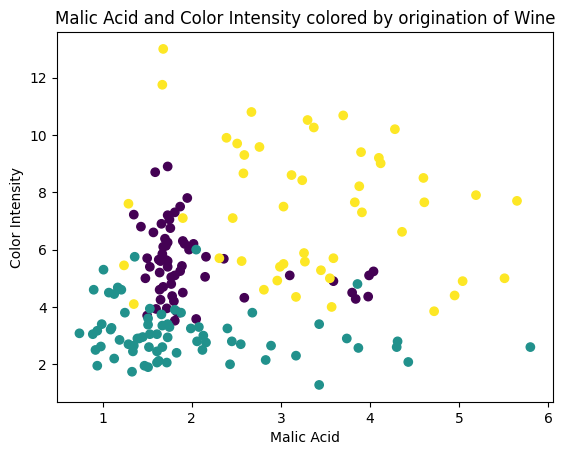

In [28]:
wine_df.describe()
wine_df[wine_df['color_intensity'] < 2]

plt.scatter(wine_df["malic_acid"], wine_df["color_intensity"], c = wine_df["TARGET"])
plt.title("Malic Acid and Color Intensity colored by origination of Wine")
plt.xlabel("Malic Acid")
plt.ylabel("Color Intensity")
plt.show()
# color to target: yellow: 2, teal: 1, purple: 0

#### **Solution**

In [ ]:
df.describe()

In [ ]:
df[df['color_intensity'] < 2]

In [ ]:
plt.scatter(df["malic_acid"], df["color_intensity"], c=df["TARGET"])
plt.title("Malic Acid and Color Intensity colored by detection of Cancer")
plt.xlabel("Malic Acid")
plt.ylabel("Color Intensity")
plt.show()
# color to target: yellow: 2, teal: 1, purple: 0

### **Steps #3-6: Split data, import the algorithm, initialize the model, fit the model, and make a prediction with the testing data**
---

Set the *hyperparameter* `n_neighbors = 3`. You can skip creating a visualization for now, but if you have time you can go back and try to create one.



In [30]:
# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(wine_df[["malic_acid","color_intensity"]], wine_df[["TARGET"]], test_size=0.2, random_state=42)

# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# initialize
model = KNeighborsClassifier(n_neighbors = 3)

# fit
model.fit(X_train, y_train)
# predict
pred = model.predict(X_test)

### **Step #7: Evaluate your model**
---

Display the `accuracy_score` and `ConfusionMatrixDisplay.from_estimator`.

Accuracy Score:  0.8611111111111112


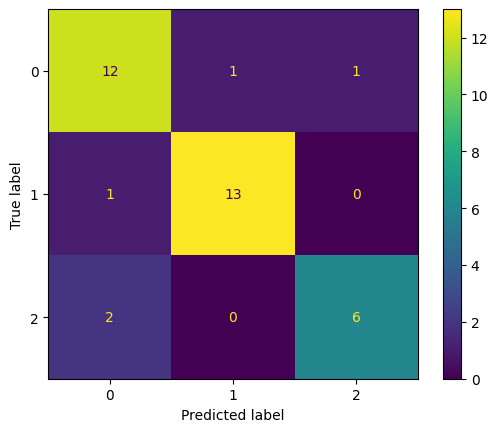

In [31]:
# Evaluation of accuracy
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Step #8: Use the model**
---

Who is likely to have cultivated a wine with `malic_acid = 4.1` and `color_intensity = 1.1` ?


In [32]:
# First Wine
wine1 = pd.DataFrame([[4.1, 1.1]], columns=["malic_acid", "color_intensity"])
prediction = model.predict(wine1.values)[0]
print(f"Wine 1 {['is made from the first cultivar', 'is not made from the first cultivar'][prediction]}")


Wine 1 is not made from the first cultivar


### **Reflection question**
Answer the following question:

1. How accurate is your model? Can you think of a way to improve the accuracy?

In [33]:
''

'The model is 86.1% accurate. You could improve the accuracy by adding another variable with a higher correlation'

''

''

<a name="p4"></a>
## [OPTIONAL] **Part 4: Zoo Animal Classification Dataset**
---
#### **About the Dataset**
The following dataset contains information on various zoo animals, including their characteristics and classifications. Our goal is to build a model that predicts the classification of an animal based on its features.

The features are as follows:


*    `animal_name`: Name of the animal
*   `hair`: Hair presence*
- `feathers`: Feather presence*
-     `eggs`: Egg-laying ability*
-    ` milk`: Milk production ability*
-     `airborne`: Ability to fly*
-     `aquatic`: Ability to live in water*
- `predator`: Predatory behavior*
- `toothed`: Teeth presence*
- `backbone`: Backbone presence*
-  `breathes`: Ability to breathe*
- `venomous`: Venom presence*
- `fins`: Fin presence*
- `legs`: Number of legs (0, 2, 4, 5, 6, or 8)
- `tail`: Tail presence*
- `domestic`: Domestication status*
- `catsize`: Cat-like size*
- `class_type`: Numeric class identifier (1-7)

Note: \* = (1 if yes, 0 if no)

<br>

#### **Your Task**
* Build a model that can predict what class an animal belongs to

### **Step #1: Load the data**
---
Use the following code to load the zoo animal classification dataset.

In [40]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"

# Create dataframe
column_names = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
animals_df = pd.read_csv(url, names=column_names)
animals_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### **Step #2: Decide independent and dependent variables**
---
We are going to use all features except `animal_name` and `class_type` as our independent variables for predicting `class_type`.



In [41]:
X = animals_df.drop(columns=['animal_name'], axis=1)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### **Step #3: Split data into training and testing data**
---

In [42]:
# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X[['hair','feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']], X[['class_type']], test_size=0.2, random_state=42)

### **Step #4: Import the KNN algorithm**
---

In [43]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step #5: Initialize your model and set hyperparameters**
---
Initialize the KNN model, and set hyperparameter `n_neighbors = 3`.

In [44]:
# initialize
model = KNeighborsClassifier(n_neighbors = 3)

### **Step #6: Fit your model, test on the testing data**
---

In [45]:
# fit
model.fit(X_train, y_train)
# predict
pred = model.predict(X_test)

### **Step #7: Evaluate your model**
---
Use `accuracy_score` as the evaluation metric.

Accuracy Score:  0.9523809523809523


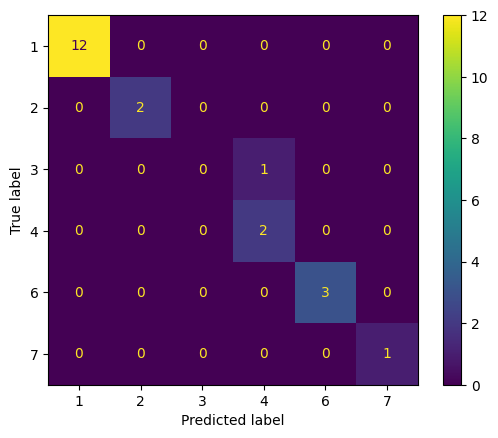

In [46]:
# Evaluation of accuracy
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Reflection question**
Answer the following question:

1. How accurately was your algorithm able to predict the type of species?

In [47]:
''

'Accuracy score is 95.2%'


''

''

<a name="p5"></a>

---
## **Part 5: Australia Dataset**
---
#### **About the Dataset**
Weather, and humans' ability to forecast/predict it plays a large role in many aspects of daily life. This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

The features are as follows:
* `Location`: the location of the weather station
* `WindSpeed`: the wind speed averaged over 10 minutes prior to 9am (in km/hr)
* `Humidity`: the humidity (percent) at 9am
* `Pressure`: atmospheric pressure reduced to mean sea level at 9am (in hundreds of hPa)
* `Temp`: temperature at 9am (in Celsius)
* `RainToday`: whether or not the rain/precipitation in the 24 hours to 9am exceeds 1mm (0: no, 1: yes)
* `RainTomorrow`: whether or not it rained at least 1mm the next day (0: no, 1: yes)

<br>

#### **Your Task**
* Build a model that can predict whether or not it will rain tomorrow
* Build another model with the optimal hyperparameters and compare the accuracies

**Run the code below before continuing:**

In [48]:
import pandas as pd
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/australia/australia_weather.csv"
australia_df = pd.read_csv(url)
australia_df.head(10)

,Location,WindSpeed,Humidity,Pressure,Temp,RainToday,RainTomorrow
0,Albury,20,71,10.077,16.9,0,0
1,Albury,4,44,10.106,17.2,0,0
2,Albury,7,82,10.108,17.8,0,0
3,Albury,19,55,10.092,20.6,0,0
4,Albury,6,48,10.134,16.3,0,0
5,Albury,15,58,10.070,20.1,1,0
6,Albury,17,48,10.118,20.4,0,1
7,Albury,15,89,10.105,15.9,1,1
8,Albury,24,65,10.012,15.8,1,0
9,Albury,11,69,10.122,17.2,0,1


### **Part #1**
---
Create a KNN model with the hyperparameter `n_neighbors = 3` in order to predict whether or not it will rain tomorrow. Use all features except `Location` and `RainTomorrow`, and then train and evaluate the model using `accuracy_score`.

Accuracy Score:  0.7573831355121786


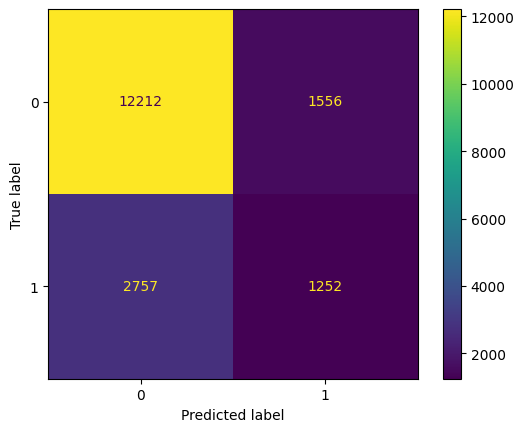

In [50]:
X = australia_df.drop(['Location', 'RainTomorrow'], axis=1)
X.head()

# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, australia_df['RainTomorrow'], test_size=0.2, random_state=42)

# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# initialize
model = KNeighborsClassifier(n_neighbors = 3)

# fit
model.fit(X_train, y_train)
# predict
pred = model.predict(X_test)

# Evaluation of accuracy
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Part #2**
---
Run the code below to find the optimal hyperparameter value `N`. Using this value, create a KNN model with the hyperparameter `n_neighbors = N` in order to predict whether or not it will rain tomorrow. Use all features except `Location` and `RainTomorrow`, and then train and evaluate the model using `accuracy_score`.

{1: 70.95685436237835, 2: 77.12774933903358, 3: 75.73831355121786, 4: 77.96028576250211, 5: 77.13899983124261, 6: 78.06716543848793, 7: 77.90965854756145, 8: 78.38780446644542, 9: 78.18529560668279}


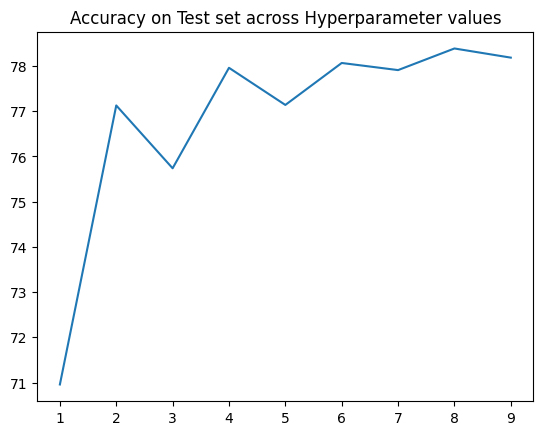

Top score of optimal classifier: 78.39%
Best Value of N to use: 8


In [51]:
# Load the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, australia_df['RainTomorrow'], test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,10):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score

plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

top_score = max(scores.values())
print(f"Top score of optimal classifier: {top_score:.2f}%")
best_n = list(scores.keys())[list(scores.values()).index(top_score)]
print(f"Best Value of N to use: {best_n}")

Accuracy Score:  0.7838780446644541


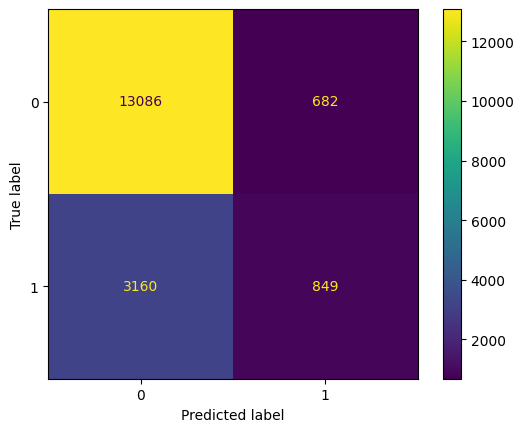

In [52]:
### Use best value of N ###

X = australia_df.drop(['Location', 'RainTomorrow'], axis=1)
X.head()

# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, australia_df['RainTomorrow'], test_size=0.2, random_state=42)

# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# initialize
model = KNeighborsClassifier(n_neighbors = 8) #change this to best value of N

# fit
model.fit(X_train, y_train)
# predict
pred = model.predict(X_test)

# Evaluation of accuracy
from sklearn import metrics
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Reflection questions**
Answer the following questions:

1. Do you think this model is useful?
2. Can you think of a real world application for this model?

In [53]:
''

'Yes the model is pretty useful. Having 78.3% accuracy is not the greatest but it definitely is not bad. The real world application of this model is weather forecast'

''

''

---
© 2023 The Coding School, All rights reserved